In [1]:
#################################################### BASIC LIB ####################################################
import pandas as pd
import numpy as np
from pathlib import Path
import os
import string
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

#################################################### METRICS ####################################################
from sklearn.metrics import (balanced_accuracy_score,f1_score,accuracy_score,make_scorer, silhouette_score, 
                             confusion_matrix, ConfusionMatrixDisplay)

#################################################### Feature Engineering ####################################################
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

#################################################### CT ####################################################
# from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#################################################### Train,Test,Split; GSCV, CV ####################################################
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from tqdm import tqdm

#################################################### MODELS ####################################################
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, 
                              HistGradientBoostingClassifier, StackingClassifier, VotingClassifier)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.naive_bayes import BernoulliNB, CategoricalNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.neural_network import MLPClassifier

#################################################### Imbalance Handling ####################################################
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

In [2]:

filepath_os = Path(os.path.join('F:/','Dataset','Scania Truck APS Failure','aps_failure_training_set.csv'))
print(filepath_os)
df = pd.read_csv(filepath_os)

F:\Dataset\Scania Truck APS Failure\aps_failure_training_set.csv


In [3]:
# df = pd.read_csv('https://raw.githubusercontent.com/Raj-Narayanan-B/Dataset/main/Scania%20Truck%20APS%20Failure/aps_failure_training_set.csv')

In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
cols = df.columns.tolist()[1:]

In [6]:
# col=list(df.columns)
# for k in col:
#     lst=[]
#     strng='1'
#     null_list=['na','nan','null']
#     for i in range(len(df[k])):
#         strng=str(df[k][i])
#         for l in strng:
#             for a in null_list:
#                 if (strng.casefold()==a):
#                     lst.append(strng)
#             if (strng.isdigit()):
#                 i+=1
#             elif (strng.isalpha()):
#                 if (not(l in string.ascii_letters)):
#                     lst.append(strng)
#                 i+=1
#             else:
#                 if (not(l in string.digits)):
#                     try:
#                         if isinstance(float(strng),float):
#                             i+=1
#                     except:
#                         lst.append(strng)
#     if (len(lst)!=0):
#         print (k,"\n",pd.unique(lst),"\n")

In [7]:
# for i in cols:
#     df[i]=pd.to_numeric(df[i],errors='coerce',downcast='integer')

In [8]:
for i in cols:
    df[i].replace('na',np.nan,inplace=True)

In [9]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [10]:
for i in cols:
    df[i]=df[i].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), object(1)
memory usage: 78.3+ MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,60000.0,5.933650e+04,1.454301e+05,0.0,834.0,30776.0,48668.0,2.746564e+06
ab_000,13671.0,7.131885e-01,3.478962e+00,0.0,0.0,0.0,0.0,2.040000e+02
ac_000,56665.0,3.560143e+08,7.948749e+08,0.0,16.0,152.0,964.0,2.130707e+09
ad_000,45139.0,1.906206e+05,4.040441e+07,0.0,24.0,126.0,430.0,8.584298e+09
ae_000,57500.0,6.819130e+00,1.615434e+02,0.0,0.0,0.0,0.0,2.105000e+04
...,...,...,...,...,...,...,...,...
ee_007,59329.0,3.462714e+05,1.728056e+06,0.0,110.0,41098.0,167814.0,1.195801e+08
ee_008,59329.0,1.387300e+05,4.495100e+05,0.0,0.0,3812.0,139724.0,1.926740e+07
ee_009,59329.0,8.388915e+03,4.747043e+04,0.0,0.0,0.0,2028.0,3.810078e+06
ef_000,57276.0,9.057895e-02,4.368855e+00,0.0,0.0,0.0,0.0,4.820000e+02


In [13]:
df['class'].unique()

array(['neg', 'pos'], dtype=object)

In [14]:
df['class']=df['class'].map({'neg':0,'pos':1})

In [15]:
df['class'].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), int64(1)
memory usage: 78.3 MB


In [17]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [18]:
np.sort(df.isna().sum())

array([    0,     0,   167,   338,   338,   338,   473,   589,   589,
         589,   589,   629,   629,   629,   629,   629,   629,   642,
         642,   642,   642,   642,   645,   645,   669,   669,   669,
         669,   669,   669,   669,   669,   669,   669,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   676,   687,   687,   687,   687,   687,   687,
         687,   687,   687,   687,   688,   688,   688,   688,   688,
         688,   688,   688,   688,   688,   691,   691,   691,   691,
         726,   726,  2500,  2500,  2500,  2500,  2501,  2502,  2503,
        2503,  2723,  2723,  2723,  2723,  2723,  2723,  2724,  2724,
        2724,  2724,  2724,  2725,  2726,  2726,  2726,  2726,  2726,
        2727,  2727,

<Axes: >

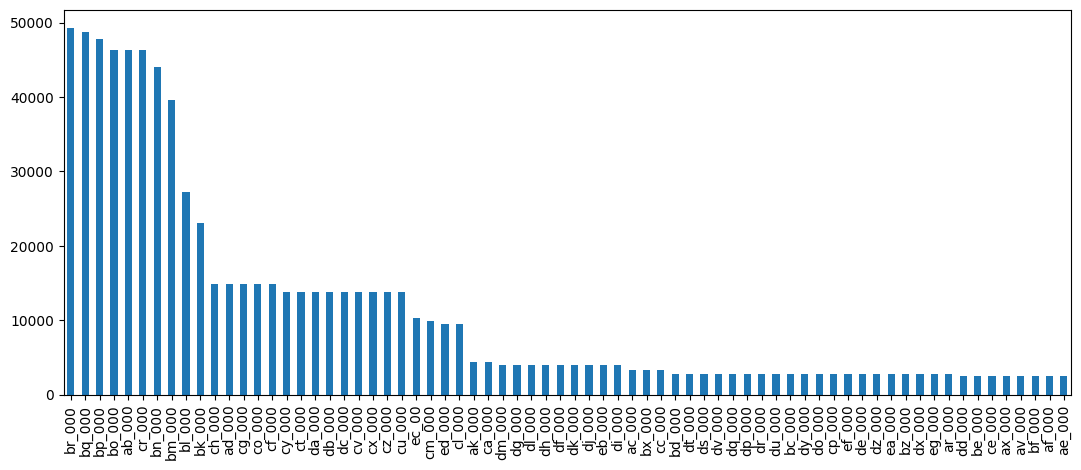

In [19]:
df.isna().sum()[df.isna().sum()>2000].sort_values(ascending=False).plot(kind='bar',figsize=(13,5))

In [20]:
df['br_000'].shape

(60000,)

In [21]:
df.shape

(60000, 171)

In [22]:
(df.isna().sum()[df.isna().sum()>30000]/60000)*100

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64

In [23]:
pd.DataFrame(data=(df.isna().sum()[df.isna().sum()>30000],(df.isna().sum()[df.isna().sum()>30000]/60000)*100)).T.sort_values(by=1,ascending=False)

,0,1
br_000,49264.0,82.106667
bq_000,48722.0,81.203333
bp_000,47740.0,79.566667
bo_000,46333.0,77.221667
ab_000,46329.0,77.215000
cr_000,46329.0,77.215000
bn_000,44009.0,73.348333
bm_000,39549.0,65.915000


In [24]:
describe_cols = df.isna().sum()[df.isna().sum()>30000].index
df[describe_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ab_000,13671.0,0.713189,3.478962,0.0,0.0,0.0,0.0,204.0
bm_000,20451.0,399603.167571,407071.846632,0.0,172210.0,239140.0,369100.0,1310700.0
bn_000,15991.0,463710.833594,464447.341741,0.0,171720.0,251400.0,493100.0,1310700.0
bo_000,13667.0,513147.820297,497353.671372,0.0,170550.0,270660.0,1310700.0,1310700.0
bp_000,12260.0,551389.799347,519611.447203,0.0,172170.0,288320.0,1310700.0,1310700.0
bq_000,11278.0,582871.322930,536697.028750,0.0,170420.0,305100.0,1310700.0,1310700.0
br_000,10736.0,604886.613264,547227.872331,0.0,169470.0,320400.0,1310700.0,1310700.0
cr_000,13671.0,37.062980,1027.001381,0.0,0.0,0.0,0.0,57450.0


In [25]:
df.drop(columns=describe_cols,axis = 1, inplace = True)

In [26]:
df.shape

(60000, 163)

In [27]:
missing_data_index_2000 = df.isna().sum()[df.isna().sum()>2000].sort_values(ascending=False).index

In [28]:
len(missing_data_index_2000)

62

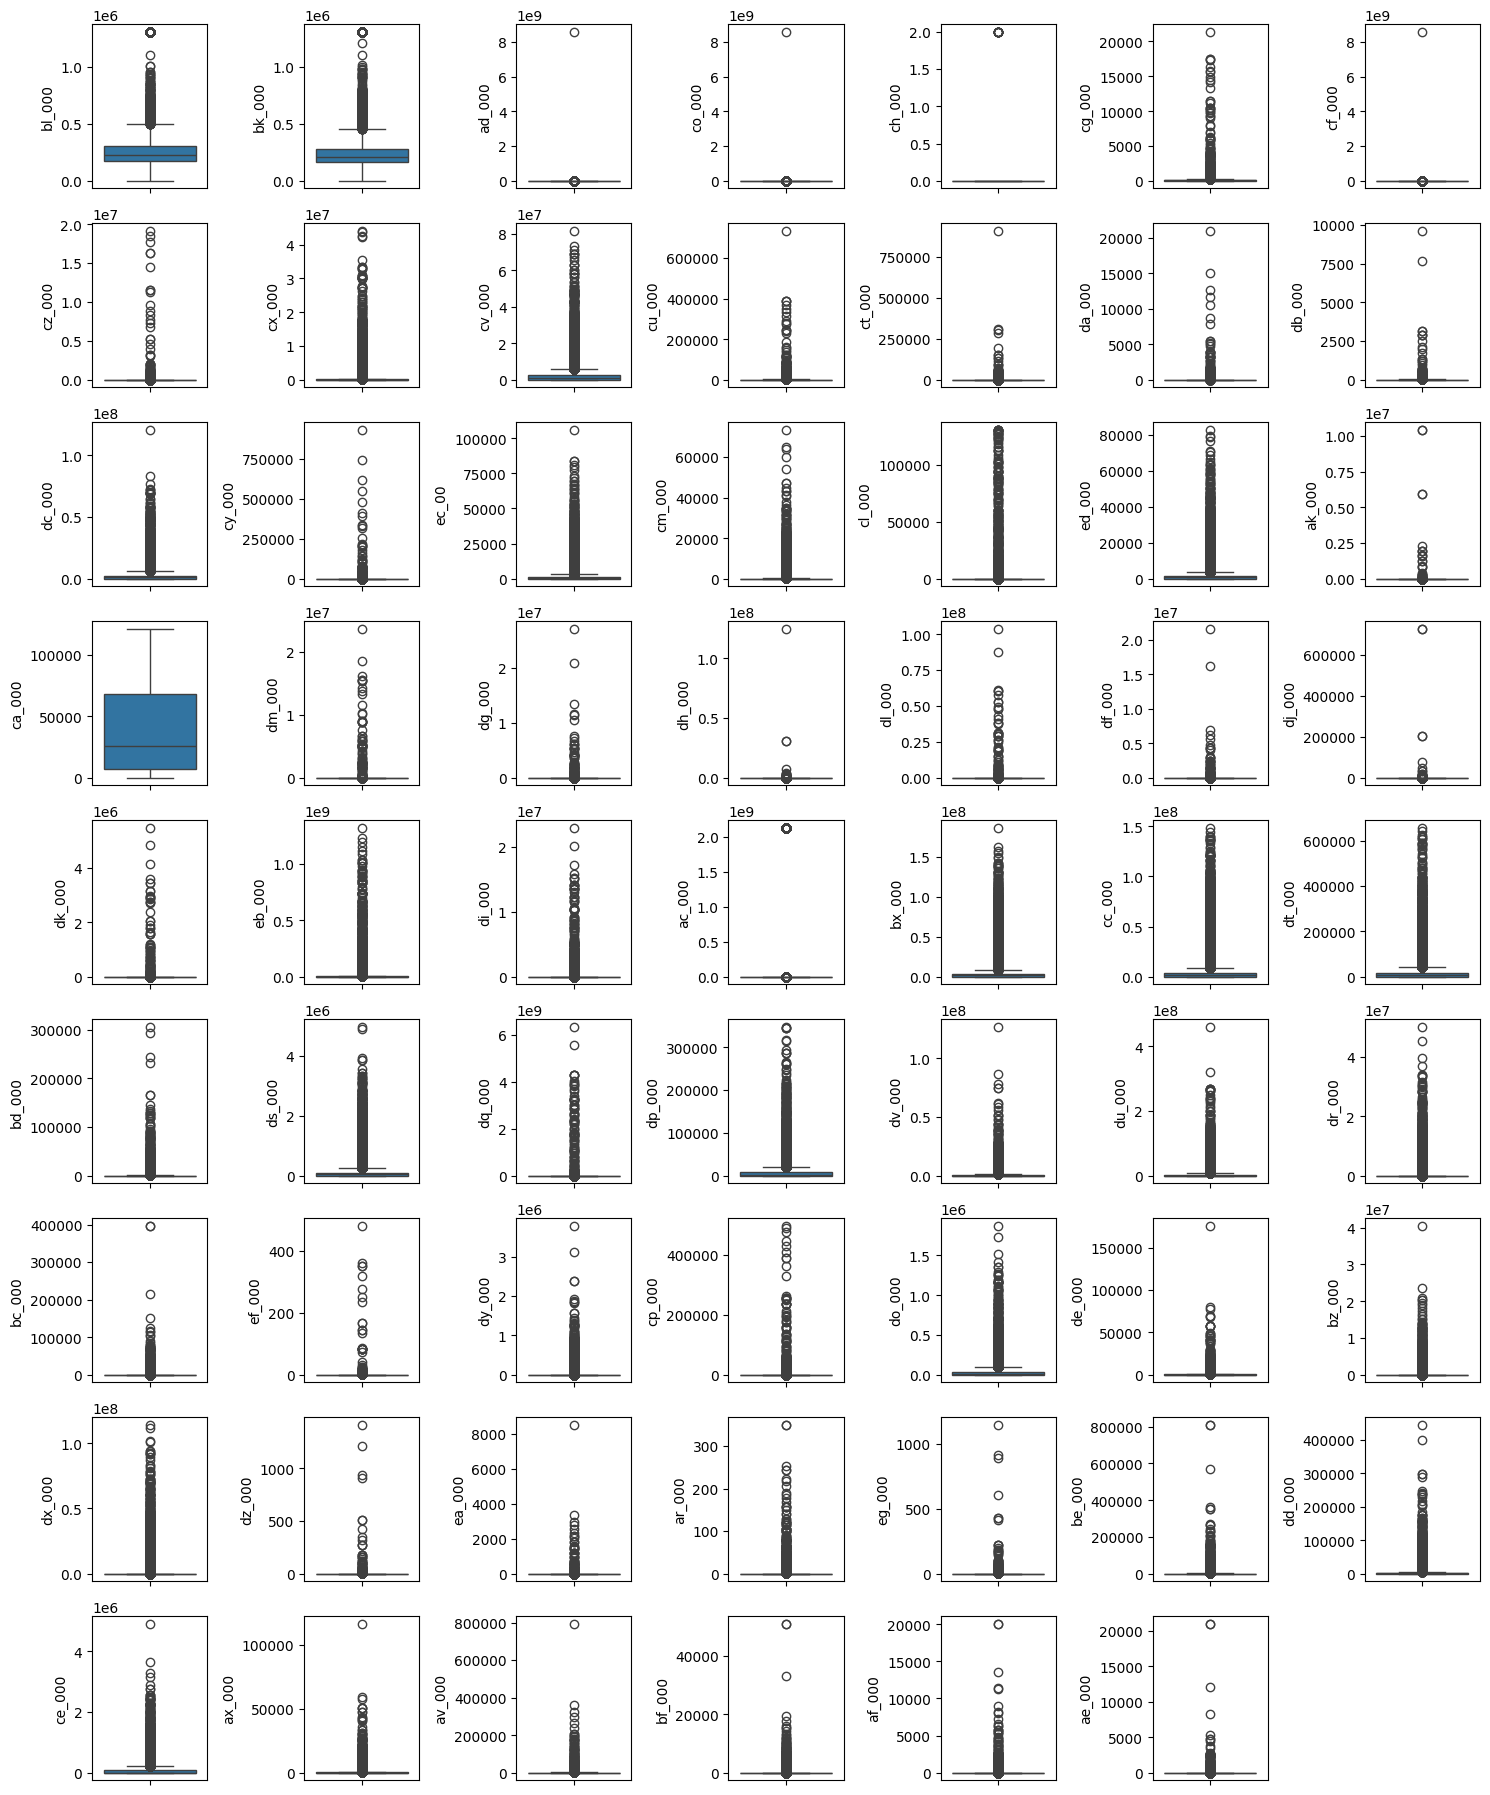

In [29]:
plt.figure(figsize = (15,20))
for i in range(len(missing_data_index_2000)):
    plt.subplot (10,7,i+1)
    boxplot_object = sns.boxplot(df[missing_data_index_2000[i]])
plt.tight_layout()
plt.show()

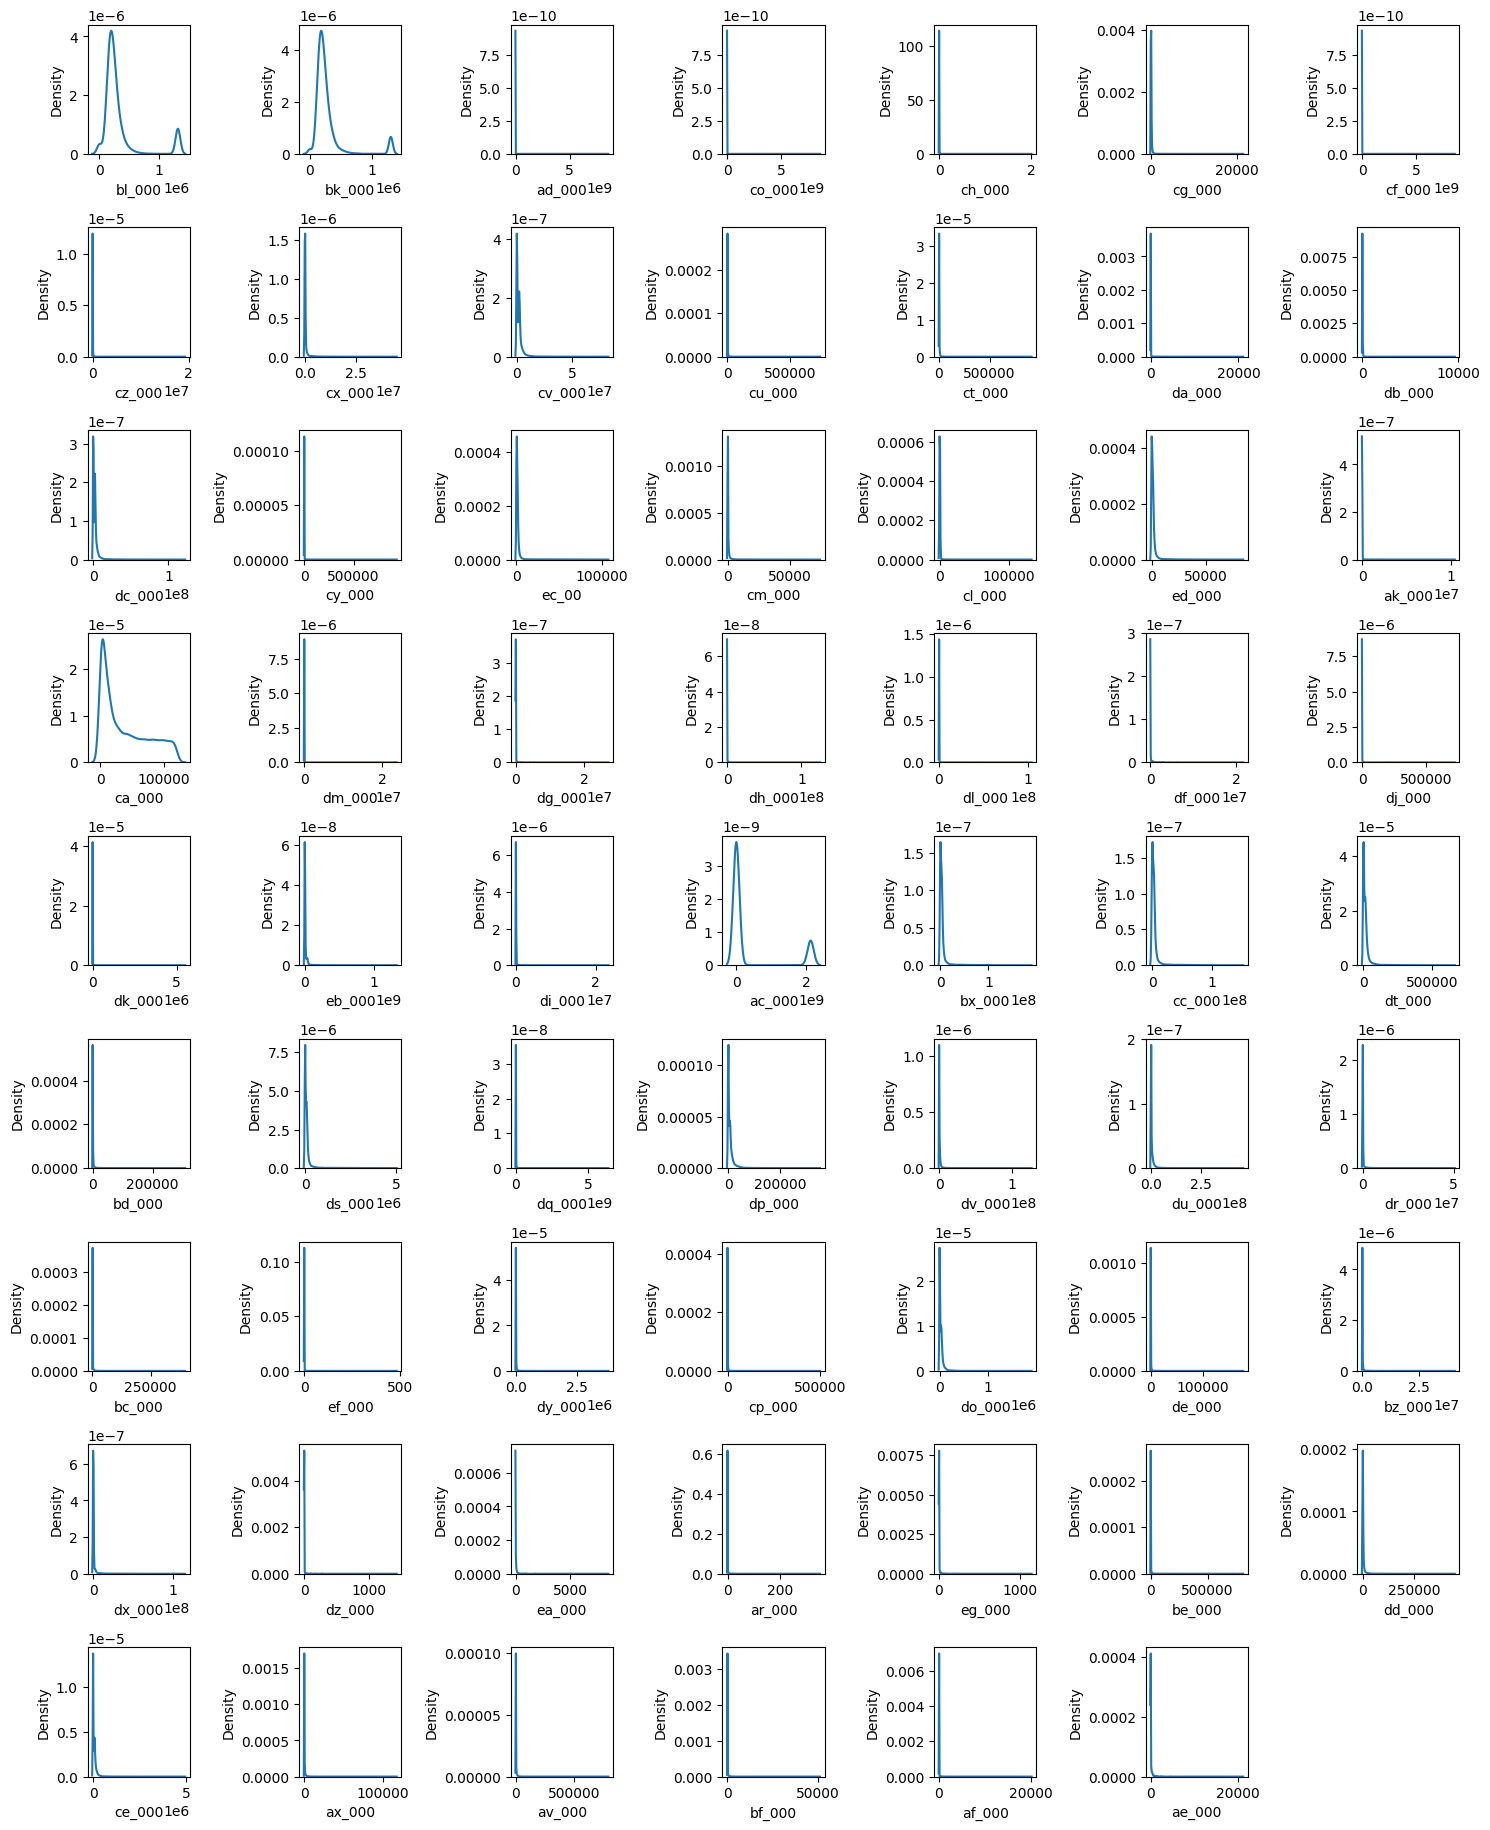

In [30]:
plt.figure(figsize = (15,20))
for i in range(len(missing_data_index_2000)):
    plt.subplot (10,7,i+1)
    sns.kdeplot(df[missing_data_index_2000[i]])
    plt.tight_layout()
plt.show()

* 1st, treat the missing values
* 2nd, treat the outliers

In [31]:
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [32]:
x = df.drop('class',axis = 1)
y = df['class']

In [33]:
print('X shape',x.shape,'\n','Y shape',y.shape)

X shape (60000, 162) 
 Y shape (60000,)


In [34]:
y.value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

In [35]:
print('X shape',x.shape,'\n','Y shape',y.shape)

X shape (60000, 162) 
 Y shape (60000,)


The data has missing values, let's treat it 1st

In [36]:
knn_imputer = KNNImputer()
x_imputed = knn_imputer.fit_transform(X = x, y = y)

In [37]:
print(knn_imputer.feature_names_in_)

['aa_000' 'ac_000' 'ad_000' 'ae_000' 'af_000' 'ag_000' 'ag_001' 'ag_002'
 'ag_003' 'ag_004' 'ag_005' 'ag_006' 'ag_007' 'ag_008' 'ag_009' 'ah_000'
 'ai_000' 'aj_000' 'ak_000' 'al_000' 'am_0' 'an_000' 'ao_000' 'ap_000'
 'aq_000' 'ar_000' 'as_000' 'at_000' 'au_000' 'av_000' 'ax_000' 'ay_000'
 'ay_001' 'ay_002' 'ay_003' 'ay_004' 'ay_005' 'ay_006' 'ay_007' 'ay_008'
 'ay_009' 'az_000' 'az_001' 'az_002' 'az_003' 'az_004' 'az_005' 'az_006'
 'az_007' 'az_008' 'az_009' 'ba_000' 'ba_001' 'ba_002' 'ba_003' 'ba_004'
 'ba_005' 'ba_006' 'ba_007' 'ba_008' 'ba_009' 'bb_000' 'bc_000' 'bd_000'
 'be_000' 'bf_000' 'bg_000' 'bh_000' 'bi_000' 'bj_000' 'bk_000' 'bl_000'
 'bs_000' 'bt_000' 'bu_000' 'bv_000' 'bx_000' 'by_000' 'bz_000' 'ca_000'
 'cb_000' 'cc_000' 'cd_000' 'ce_000' 'cf_000' 'cg_000' 'ch_000' 'ci_000'
 'cj_000' 'ck_000' 'cl_000' 'cm_000' 'cn_000' 'cn_001' 'cn_002' 'cn_003'
 'cn_004' 'cn_005' 'cn_006' 'cn_007' 'cn_008' 'cn_009' 'co_000' 'cp_000'
 'cq_000' 'cs_000' 'cs_001' 'cs_002' 'cs_003' 'cs_004

In [38]:
x_umap = pd.DataFrame(x_imputed,columns = knn_imputer.feature_names_in_)

In [39]:
x_umap.isna().any().unique()

array([False])

In [40]:
x_umap_robust = RobustScaler().fit_transform(X = x_umap, y = y)

In [41]:
x_umap_robust_df = pd.DataFrame(x_umap_robust,columns=x_umap.columns)

In [42]:
# from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=0.5, min_samples=5,n_jobs = -1)
# # dbscan.fit()
# dbscan_labels = dbscan.fit_predict(x_umap_robust_df)
# print(f"dbscan_labels: {pd.unique(dbscan_labels)}")

# x_knn_robust_dbscan_df = x_umap_robust_df.copy()
# x_knn_robust_dbscan_df['labels'] = dbscan_labels
# x_knn_robust_dbscan_df.head()

In [43]:
# x_knn_robust_dbscan_df.shape

In [44]:
x_umap_robust_df.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.960028,1.421893e+06,0.133690,0.0,0.0,0.0,0.0,0.0,0.0,0.673569,...,2.315743,1.761533,1.080387,0.704193,0.902973,0.699377,0.500546,0.000000,0.0,0.0
1,0.047707,-1.214548e-01,0.221390,0.0,0.0,0.0,0.0,0.0,0.0,0.292058,...,0.433736,0.308070,0.157906,0.141867,0.154202,0.241217,0.676060,0.744786,0.0,0.0
2,0.214575,3.069736e-02,-0.347594,0.0,0.0,0.0,0.0,0.0,0.0,-0.041453,...,0.102831,0.223938,0.439750,0.553251,0.835894,0.699771,0.658417,0.255214,0.0,0.0
3,-0.643141,-7.474141e-02,-0.438503,0.0,10.0,0.0,0.0,0.0,318.0,-0.030126,...,-0.533920,-0.512501,-0.474528,-0.473079,-0.332746,-0.242732,-0.027208,0.000000,4.0,32.0
4,0.629218,7.914581e-01,0.609626,0.0,0.0,0.0,0.0,0.0,0.0,0.804153,...,0.894661,0.546500,0.399433,0.396926,0.712768,1.615530,3.100467,0.604767,0.0,0.0


In [45]:
x_umap_robust_df.shape

(60000, 162)

In [46]:
y.unique()

array([0, 1], dtype=int64)

In [47]:
y.value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

## Without SMOTE

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(x_umap_robust_df.iloc[:10000,:],
                                             y.iloc[:10000],
                                             test_size=0.25,
                                             random_state = 8)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((7500, 162), (2500, 162), (7500,), (2500,))

In [49]:
models = {'Logistic_Regression': LogisticRegression(), 
          'SGD_Classifier': SGDClassifier(),
          'Random Forest': RandomForestClassifier(), 
          'Ada_Boost': AdaBoostClassifier(), 
          'Grad_Boost': GradientBoostingClassifier(), 
          'Bagging_Classifier': BaggingClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(), 
          'Hist_Grad_Boost_Classifier': HistGradientBoostingClassifier(), 
        #   'Stacking_Classifier': StackingClassifier(), 
        #   'Voting_Classifier': VotingClassifier(),
          'Decision_Tree_Classifier': DecisionTreeClassifier(),
          'XGB_Classifier': XGBClassifier(),
          'KNN_Classifier': KNeighborsClassifier(),
          'Linear_SVC': LinearSVC(), 
          'SVC': SVC(), 
          # 'NuSVC': NuSVC(),
          'MLP_Classifier': MLPClassifier()
}

balanced_accuracy_score_satharan = {}
f1_score_satharan = {}
accuracy_score_satharan = {}
cost_satharan = {}

for model_name,model in models.items():
    print(model_name)
    model.fit(xtrain,ytrain)
    y_pred_ = model.predict(xtest)

    balanced_accuracy_score_satharan[model_name] = balanced_accuracy_score(y_true = ytest,y_pred = y_pred_)
    print(f'Balanced_accuracy_score: {balanced_accuracy_score_satharan[model_name]}')

    f1_score_satharan[model_name] = f1_score(y_true = ytest, y_pred = y_pred_)
    print(f'f1_score: {f1_score_satharan[model_name]}')

    accuracy_score_satharan[model_name] = accuracy_score(y_true = ytest, y_pred = y_pred_)
    print(f'Accuracy_score: {accuracy_score_satharan[model_name]}')

    tn, fp, fn, tp = confusion_matrix(y_true = ytest,y_pred = y_pred_).ravel()
    cost = (10*fp)+(500*fn)
    cost_satharan[model_name] = cost
    print(f'Cost: {cost_satharan[model_name]}\n')



Logistic_Regression
Balanced_accuracy_score: 0.6098295595478544
f1_score: 0.05652173913043478
Accuracy_score: 0.6528
Cost: 18480

SGD_Classifier
Balanced_accuracy_score: 0.6006608553913753
f1_score: 0.0538860103626943
Accuracy_score: 0.6348
Cost: 18930

Random Forest
Balanced_accuracy_score: 0.8351227809078345
f1_score: 0.7209302325581396
Accuracy_score: 0.9904
Cost: 7590

Ada_Boost
Balanced_accuracy_score: 0.8029215832181709
f1_score: 0.6913580246913581
Accuracy_score: 0.99
Cost: 9070

Grad_Boost
Balanced_accuracy_score: 0.8222157258778924
f1_score: 0.631578947368421
Accuracy_score: 0.986
Cost: 8190

Bagging_Classifier
Balanced_accuracy_score: 0.813587399454307
f1_score: 0.6987951807228915
Accuracy_score: 0.99
Cost: 8580

ExtraTreesClassifier
Balanced_accuracy_score: 0.8242532156904433
f1_score: 0.7058823529411764
Accuracy_score: 0.99
Cost: 8090

Hist_Grad_Boost_Classifier
Balanced_accuracy_score: 0.8357340278515999
f1_score: 0.746987951807229
Accuracy_score: 0.9916
Cost: 7560

Decisi

In [50]:
ytrain.value_counts()

class
0    7351
1     149
Name: count, dtype: int64

In [51]:
models_df_satharan = pd.DataFrame([balanced_accuracy_score_satharan,f1_score_satharan,accuracy_score_satharan,cost_satharan]).T
models_df_satharan.columns = ['Balanced_accuracy_score','F1_score','Accuracy_score','Cost']

In [52]:
models_df_satharan.sort_values(by = 'Balanced_accuracy_score',ascending=False)

,Balanced_accuracy_score,F1_score,Accuracy_score,Cost
XGB_Classifier,0.846604,0.761905,0.9920,7060.0
Hist_Grad_Boost_Classifier,0.835734,0.746988,0.9916,7560.0
Random Forest,0.835123,0.720930,0.9904,7590.0
ExtraTreesClassifier,0.824253,0.705882,0.9900,8090.0
Grad_Boost,0.822216,0.631579,0.9860,8190.0
Decision_Tree_Classifier,0.820789,0.588235,0.9832,8260.0
Bagging_Classifier,0.813587,0.698795,0.9900,8580.0
Ada_Boost,0.802922,0.691358,0.9900,9070.0
MLP_Classifier,0.739068,0.271186,0.9484,12070.0
Linear_SVC,0.667056,0.226667,0.9536,15370.0


### Checking using SMOTE

In [53]:
smote = SMOTETomek(n_jobs=-1,sampling_strategy='minority',random_state=8)
x_smote,y_smote = smote.fit_resample(X = x_umap_robust_df.iloc[:10000,:],
                                     y = y.iloc[:10000])

In [54]:
y_smote.value_counts()

class
0    9780
1    9780
Name: count, dtype: int64

In [55]:
x_smote.shape,y_smote.shape

((19560, 162), (19560,))

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,random_state=8,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((14670, 162), (4890, 162), (14670,), (4890,))

In [57]:
models = {'Logistic_Regression': LogisticRegression(), 
          'SGD_Classifier': SGDClassifier(),
          'Random Forest': RandomForestClassifier(), 
          'Ada_Boost': AdaBoostClassifier(), 
          'Grad_Boost': GradientBoostingClassifier(), 
          'Bagging_Classifier': BaggingClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(), 
          'Hist_Grad_Boost_Classifier': HistGradientBoostingClassifier(), 
        #   'Stacking_Classifier': StackingClassifier(), 
        #   'Voting_Classifier': VotingClassifier(),
          'Decision_Tree_Classifier': DecisionTreeClassifier(),
          'XGB_Classifier': XGBClassifier(),
          'KNN_Classifier': KNeighborsClassifier(),
          'Linear_SVC': LinearSVC(), 
          'SVC': SVC(), 
          # 'NuSVC': NuSVC(),
          'MLP_Classifier': MLPClassifier()
}

balanced_accuracy_score_ = {}
f1_score_ = {}
accuracy_score_ = {}
cost_ = {}

for model_name,model in models.items():
    print(model_name)
    model.fit(x_train,y_train)
    y_pred_ = model.predict(x_test)

    balanced_accuracy_score_[model_name] = balanced_accuracy_score(y_true = y_test,y_pred = y_pred_)
    print(f'Balanced_accuracy_score: {balanced_accuracy_score_[model_name]}')

    f1_score_[model_name] = f1_score(y_true = y_test, y_pred = y_pred_)
    print(f'f1_score: {f1_score_[model_name]}')

    accuracy_score_[model_name] = accuracy_score(y_true = y_test, y_pred = y_pred_)
    print(f'Accuracy_score: {accuracy_score_[model_name]}')

    tn, fp, fn, tp = confusion_matrix(y_true = y_test,y_pred = y_pred_).ravel()
    cost = (10*fp)+(500*fn)
    cost_[model_name] = cost
    print(f'Cost: {cost_[model_name]}\n')


Logistic_Regression


Balanced_accuracy_score: 0.6283037672649022
f1_score: 0.713632781717888
Accuracy_score: 0.6284253578732106
Cost: 107350

SGD_Classifier
Balanced_accuracy_score: 0.6816969955289574
f1_score: 0.7456685191238966
Accuracy_score: 0.681799591002045
Cost: 96410

Random Forest
Balanced_accuracy_score: 0.9922261938058462
f1_score: 0.9922858302882663
Accuracy_score: 0.9922290388548057
Cost: 1360

Ada_Boost
Balanced_accuracy_score: 0.9903871245749432
f1_score: 0.9904257486249746
Accuracy_score: 0.9903885480572597
Cost: 7820

Grad_Boost
Balanced_accuracy_score: 0.9879306272440525
f1_score: 0.9880542619963556
Accuracy_score: 0.9879345603271984
Cost: 3530

Bagging_Classifier
Balanced_accuracy_score: 0.9924314455746581
f1_score: 0.992475086434818
Accuracy_score: 0.9924335378323108
Cost: 3310

ExtraTreesClassifier
Balanced_accuracy_score: 0.9912031132695351
f1_score: 0.9912831948104601
Accuracy_score: 0.9912065439672801
Cost: 920

Hist_Grad_Boost_Classifier
Balanced_accuracy_score: 0.9952947662973585


In [58]:
models_df_smote = pd.DataFrame([balanced_accuracy_score_,f1_score_,accuracy_score_,cost_]).T
models_df_smote.columns = ['Balanced_accuracy_score','F1_score','Accuracy_score','Cost']

In [59]:
models_df_smote.sort_values(by = 'Accuracy_score',ascending=False)

,Balanced_accuracy_score,F1_score,Accuracy_score,Cost
XGB_Classifier,0.995704,0.995722,0.995706,1190.0
Hist_Grad_Boost_Classifier,0.995295,0.995319,0.995297,720.0
Bagging_Classifier,0.992431,0.992475,0.992434,3310.0
Random Forest,0.992226,0.992286,0.992229,1360.0
ExtraTreesClassifier,0.991203,0.991283,0.991207,920.0
Ada_Boost,0.990387,0.990426,0.990389,7820.0
Grad_Boost,0.987931,0.988054,0.987935,3530.0
Decision_Tree_Classifier,0.986910,0.986987,0.986912,9950.0
KNN_Classifier,0.973819,0.974152,0.973824,17940.0
MLP_Classifier,0.916123,0.922319,0.916155,9980.0
